# DG tutorial w. Lagrange

In [19]:
#define imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import quad
from numpy.linalg import inv
from scipy.interpolate import lagrange
from scipy.special import roots_legendre

We'd now like to generate an interpolant for an arbitrary function using Lagrange polynomials evaluated at the roots of the Legendre polynomials.

In [20]:
#generate ID, a gaussian
def q_ID(x, mu, sigma):
    return np.exp(-(x-mu)**2./sigma**2.)

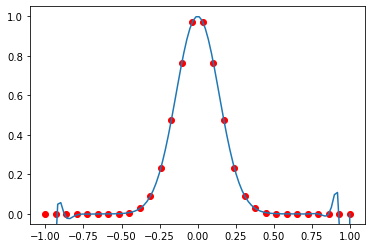

In [53]:
#define number of points to interpolate through; by construction
#of the Lagrange polynomials, this is equal to the degree of the
#interpolating polynomial
order = 30

#define x in -1, 1
mu    = 0
sigma = 0.2
x     = np.linspace(-1, 1, order)
y     = q_ID(x, mu, sigma)

x_upsampled = np.linspace(-1, 1, 100)

#generate Lagrange interpolating polynomial
l = lagrange(x, y)

pl.plot(x,y, 'ro')
pl.plot(x_upsampled, l(x_upsampled))
pl.ylim([-0.05, 1.05])
pl.show()

Notice that the result suffers from an oscillatory instability approaching the boundaries.  See [link] for an explanation.

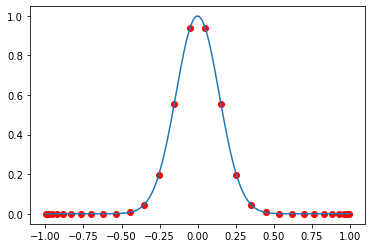

In [54]:
#instead of sampling x evenly, sample at roots of Legendre
roots, weights = roots_legendre(order)

x2 = roots
y2 = q_ID(x2, mu, sigma)

l2 = lagrange(x2, y2)

pl.plot(x2,y2, 'ro')
pl.plot(x_upsampled, l2(x_upsampled))
pl.show()

Note: scipy's implementation of the Lagrange interpolating polynomial breaks down above NumPoints ~ 30.

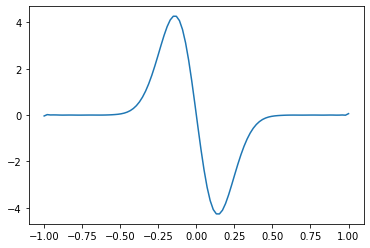

In [55]:
#we'll also need the derivative of this interpolating polynomial
pl.plot(x_upsampled, l2.deriv(1)(x_upsampled))